# Decision Tree - Greed Search

- Dataset: https://www.kaggle.com/datasets/ninzaami/loan-predication

### Tujuan Model

Dalam konteks ini, tujuan bisnisnya tampaknya terkait dengan prediksi kelayakan pemberian pinjaman (loan). Dengan menggunakan fitur-fitur seperti 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', dan 'Credit_History', tujuannya mungkin untuk memprediksi apakah seseorang layak atau tidak layak menerima pinjaman ('Loan_Status': 'Y' atau 'N') berdasarkan data yang tersedia.

Pada umumnya, pemodelan seperti ini digunakan dalam industri keuangan, terutama perbankan atau lembaga keuangan lainnya, di mana mereka ingin mengevaluasi risiko dalam memberikan pinjaman kepada pelanggan. Dengan memahami pola-pola dalam data seperti pendapatan, jumlah pinjaman, sejarah kredit, dan lainnya, mereka dapat membuat keputusan yang lebih baik tentang apakah seseorang berpotensi untuk membayar kembali pinjaman atau tidak.

Oleh karena itu, melalui pemodelan dan analisis seperti yang dilakukan dalam kode tersebut, tujuan bisnisnya adalah untuk memprediksi dengan lebih baik siapa yang memiliki kemungkinan lebih tinggi untuk membayar kembali pinjaman, yang pada gilirannya membantu lembaga keuangan membuat keputusan yang lebih tepat dalam memberikan pinjaman.

**Tentang Dataset:**
*   ApplicantIncome: Pendapatan pemohon pinjaman.
*   CoapplicantIncome: Pendapatan co-pemohon pinjaman.
*   LoanAmount: Jumlah pinjaman yang diajukan.
*   Loan_Amount_Term: Jangka waktu pinjaman dalam bulan.
*   Credit_History: Riwayat kredit pemohon
*   kredit yang baik, sementara 0.0 bisa menunjukkan sebaliknya).
*   Loan_Status: Status pemberian pinjaman (1 untuk disetujui, 0 untuk ditolak).

## Library

In [68]:
import numpy as np
import pandas as pd
import time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.tree import plot_tree
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

## Preprocessing Data

In [69]:
data = pd.read_csv('loadPredictionAsli.csv')

# Memilih kolom-kolom yang diinginkan
selected_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                    'Credit_History', 'Loan_Status']

# Menggunakan metode loc untuk memilih kolom yang diinginkan
data_selected = data.loc[:, selected_columns]

# Menampilkan data yang sudah dipilih
print(data_selected)


     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Loan_Status  
0               1.0           Y  
1               1.0           N  
2               1.0  

In [70]:
# Mendefinisikan pemetaan label ke nilai numerik
label_mapping = {'Y': 1, 'N': 0}

# Mengganti nilai kategori dengan nilai numerik menggunakan map
data_selected['Loan_Status'] = data_selected['Loan_Status'].map(label_mapping)

In [71]:
data_selected.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [72]:
jumlah_duplikat = data_selected.duplicated().sum()

print("Jumlah Duplikat:", jumlah_duplikat)

Jumlah Duplikat: 1


In [73]:
# Menampilkan jumlah nilai yang hilang per kolom
jumlah_missing_per_kolom = data_selected.isnull().sum()
print(jumlah_missing_per_kolom)

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64


In [74]:

# Mengisi missing value pada 'LoanAmount' dengan nilai rata-rata
mean_loan_amount = data_selected['LoanAmount'].mean()
data_selected['LoanAmount'].fillna(mean_loan_amount, inplace=True)

# Mengisi missing value pada 'Loan_Amount_Term' dengan nilai modus
mode_loan_term = data_selected['Loan_Amount_Term'].mode()[0]
data_selected['Loan_Amount_Term'].fillna(mode_loan_term, inplace=True)

# Mengisi missing value pada 'Credit_History' dengan nilai modus
mode_credit_history = data_selected['Credit_History'].mode()[0]
data_selected['Credit_History'].fillna(mode_credit_history, inplace=True)

# Menampilkan jumlah nilai yang masih hilang setelah pengisian
print(data_selected.isnull().sum())

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64


In [75]:
data_selected.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1
1,4583,1508.0,128.000000,360.0,1.0,0
2,3000,0.0,66.000000,360.0,1.0,1
3,2583,2358.0,120.000000,360.0,1.0,1
4,6000,0.0,141.000000,360.0,1.0,1


In [76]:
dataClear = pd.read_csv('loadPredictionClear.csv')

## Split Data & Make Model

In [77]:
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

file_loc = 'loadPredictionClear.csv'
df = pd.read_csv(file_loc)

In [78]:
from sklearn.tree import DecisionTreeClassifier as dt
model = dt()

In [79]:
model

DecisionTreeClassifier()

In [80]:
X = df.iloc[:,0:len(df.columns)-1].values
Y = df.iloc[:,-1].values

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [82]:
# Latih model pada data latih
model.fit(X_train, Y_train)

# Simpan model ke dalam file model.pkl
joblib.dump(model, 'model.pkl')

['model.pkl']

In [83]:
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_macro')

In [84]:
scores.mean()

0.6791534142910143

In [85]:
# Fit the model
model.fit(X_train, Y_train)
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [86]:
model

DecisionTreeClassifier()

In [87]:
train_cols = df.columns[0:len(df.columns)-1]
target_cols = df.columns[-1]

In [88]:
print('The Training F1 Score is', f1_score(train_predictions, Y_train))
print('The Testing F1 Score is', f1_score(test_predictions, Y_test))

The Training F1 Score is 0.9660743134087236
The Testing F1 Score is 0.7655502392344496


In [89]:


parameters = {'max_depth':[1,2,3,4,5],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[2,3,4,5],
              'criterion' : ['gini','entropy']}
scorer = make_scorer(f1_score)

@timeit
def generate_model_from_search(model, parameters, scorer, X, y):
    search_obj = GridSearchCV(model, parameters, scoring=scorer)
    fit_obj = search_obj.fit(X, y)
    best_model = fit_obj.best_estimator_
    return best_model

best_model_grid = generate_model_from_search(model, parameters, scorer, X_train, Y_train)

scores = cross_val_score(best_model_grid, X_train, Y_train, cv=5, scoring='f1_macro')
scores.mean()

best_model_grid.fit(X_train, Y_train)
# Make predictions using the new model.
best_train_predictions = best_model_grid.predict(X_train)
best_test_predictions = best_model_grid.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, Y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, Y_test))


'generate_model_from_search'  7880.15 ms
The training F1 Score is 0.8705547652916075
The testing F1 Score is 0.8934426229508197


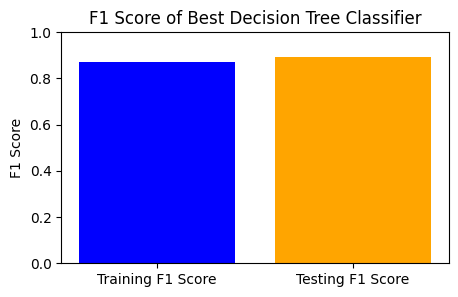

In [90]:
# Hitung F1 Score dari model terbaik pada training set dan testing set
train_f1 = f1_score(best_train_predictions, Y_train)
test_f1 = f1_score(best_test_predictions, Y_test)

# Plotting F1 Score pada training dan testing set
labels = ['Training F1 Score', 'Testing F1 Score']
scores = [train_f1, test_f1]

plt.figure(figsize=(5, 3))
plt.bar(labels, scores, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set batas sumbu y dari 0 hingga 1 untuk F1 Score
plt.title('F1 Score of Best Decision Tree Classifier')
plt.ylabel('F1 Score')
plt.show()

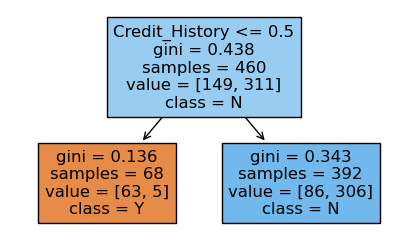

In [91]:

# Misal best_clf_grid adalah model terbaik yang telah dilatih melalui GridSearchCV
best_clf_grid.fit(X_train, Y_train)

plt.figure(figsize=(5, 3))
class_names = ['Y', 'N']
plot_tree(best_clf_grid, feature_names=train_cols, class_names=class_names, filled=True)
plt.show()


### Simulasi 

In [92]:
# Fungsi untuk melakukan prediksi berdasarkan data input
def predict_loan_status(model, input_data):
    input_data_as_numpy_array = np.array(input_data)
    input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
    prediction = model.predict(input_data_reshape)
    return prediction

# Contoh data input untuk prediksi
example_input_data = [5849, 0.0, 360.0, 1.0, 1]

# Lakukan prediksi
prediction = predict_loan_status(best_clf_grid, example_input_data)

# Tampilkan hasil prediksi
print(prediction)
print("Loan Status: ")
if prediction[0] == 0:
    print('Loan No')
else:
    print('Loan Yes')


[1]
Loan Status: 
Loan Yes


## Data Visualization

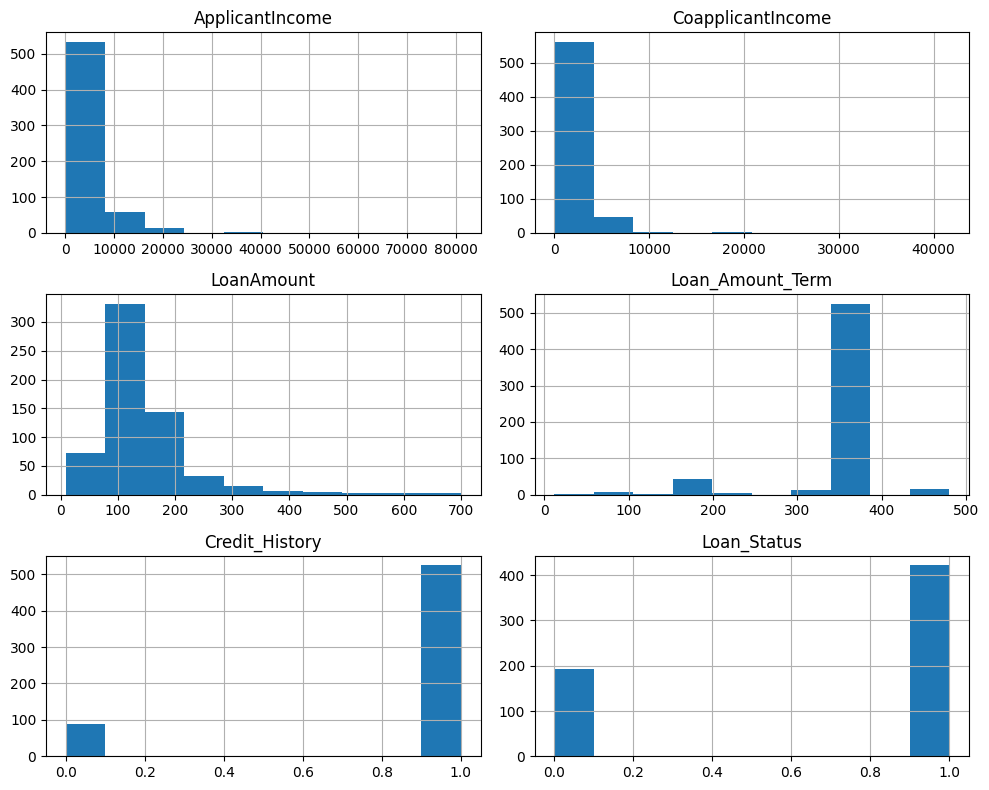

In [93]:
data_selected.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

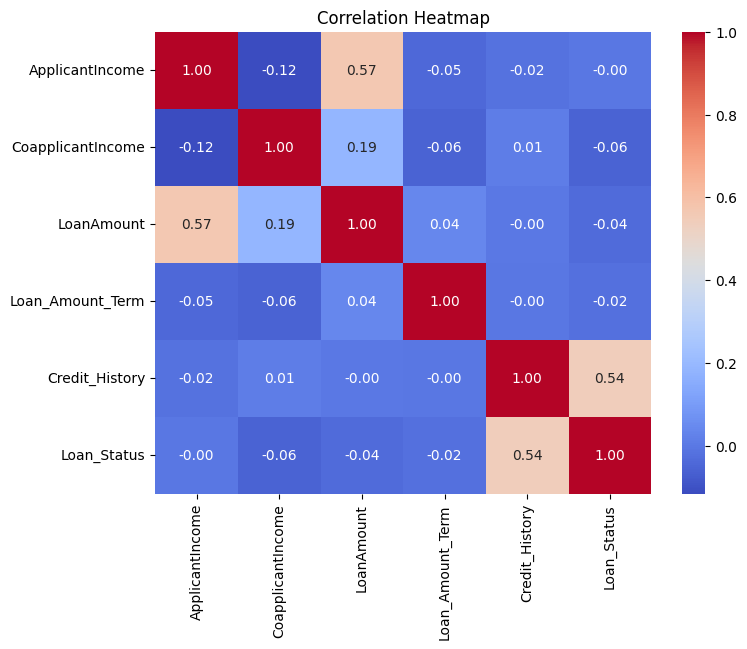

In [94]:
correlation_matrix = data_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


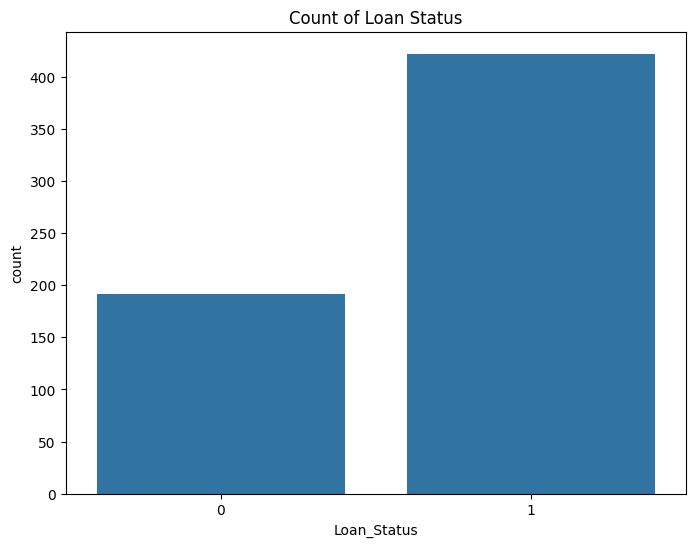

In [95]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=data_selected)
plt.title('Count of Loan Status')
plt.show()